In [14]:
import os
import sys
import re
import copy
import string
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ase.io import read

from operator import itemgetter
from itertools import groupby

In [15]:
df = pd.read_csv('train2.csv')
#df.plot(kind = 'scatter', x = 'CO2W', y = 'Heat')
#plt.plot()
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [16]:
df.corr()

,Unnamed: 0,vol,weight,density [g/cm^3],SA,VF,VV,ML,OL1,OL2,CO2/N2,Heat,CO2W
Unnamed: 0,1.000000,0.241166,0.167785,-0.059099,0.211032,0.216748,0.292732,-0.030340,0.062201,0.066646,-0.009892,-0.303176,-0.290672
vol,0.241166,1.000000,0.749409,-0.407071,0.443082,0.554089,0.749565,-0.040473,0.045090,0.070940,-0.036993,-0.422459,-0.272370
weight,0.167785,0.749409,1.000000,-0.055915,0.140366,0.233530,0.306594,0.132793,0.184264,0.161813,-0.008108,-0.144148,-0.153225
density [g/cm^3],-0.059099,-0.407071,-0.055915,1.000000,-0.650861,-0.829046,-0.688909,0.202932,0.110932,0.040561,0.092101,0.769604,0.243546
SA,0.211032,0.443082,0.140366,-0.650861,1.000000,0.736979,0.722418,-0.223249,-0.098593,-0.029726,-0.058481,-0.620024,-0.363283
VF,0.216748,0.554089,0.233530,-0.829046,0.736979,1.000000,0.850879,-0.216093,-0.038597,0.023871,-0.102950,-0.847862,-0.462296
VV,0.292732,0.749565,0.306594,-0.688909,0.722418,0.850879,1.000000,-0.181165,-0.030498,0.024882,-0.070615,-0.703470,-0.429479
ML,-0.030340,-0.040473,0.132793,0.202932,-0.223249,-0.216093,-0.181165,1.000000,0.262199,0.213211,0.027035,0.221939,0.146671
OL1,0.062201,0.045090,0.184264,0.110932,-0.098593,-0.038597,-0.030498,0.262199,1.000000,0.781447,-0.004792,-0.018068,-0.104201
OL2,0.066646,0.070940,0.161813,0.040561,-0.029726,0.023871,0.024882,0.213211,0.781447,1.000000,-0.012242,-0.076246,-0.127834


In [17]:
df.isna().sum()

Unnamed: 0             0
name                   0
vol                    0
weight                 0
density [g/cm^3]       0
SA                     0
VF                     0
VV                     0
FG                   323
ML                     0
OL1                    0
OL2                    0
TP                     0
CO2/N2                 0
Heat                2089
CO2W                   0
dtype: int64

In [18]:
df['CO2W'].max()

736.0616358740373

In [19]:
def dummyEncoder(data,columns):
    for i in columns:   
        dummies = pd.get_dummies(data[i])
        data = pd.concat([data,dummies],axis = 1)
        data = data.drop( columns= i)
    return data

In [20]:
#columns =  ['TP'] ## feature ที่ทำการ ont hot
#df = dummyEncoder(df,columns)

In [21]:
df=df.drop(columns=['Unnamed: 0','name'])

In [22]:
df['TP'].unique()

array(['pcu', 'etb', 'sra', 'acs', 'fof', 'bcu', 'nbo', 'tbo', 'pts',
       'the', 'rht'], dtype=object)

In [23]:
fg=df['FG'].unique()

In [24]:
fg.shape

(401,)

In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [26]:
Q3

vol                 3605.836441
weight              1897.163660
density [g/cm^3]       1.192727
SA                  2693.670000
VF                     0.345120
VV                     0.443800
ML                     4.000000
OL1                   16.000000
OL2                   25.000000
CO2/N2                32.954388
Heat                   6.768300
CO2W                 163.139540
Name: 0.75, dtype: float64

In [27]:
df.columns

Index(['vol', 'weight', 'density [g/cm^3]', 'SA', 'VF', 'VV', 'FG', 'ML',
       'OL1', 'OL2', 'TP', 'CO2/N2', 'Heat', 'CO2W'],
      dtype='object')

In [28]:
result_dataremove = df[~((df< (Q1 - 3 * IQR)) |(df > (Q3 + 3 * IQR))).any(axis=1)] #extrean outliner
result_dataremove.dropna()

,vol,weight,density [g/cm^3],SA,VF,VV,FG,ML,OL1,OL2,TP,CO2/N2,Heat,CO2W
0,1116.667429,875.240600,1.301526,1281.139152,0.07899,0.0607,COOH-OEt,3,4,11,pcu,22.864166,6.786041,105.284502
1,2769.503842,2211.697211,1.326090,603.610000,0.13794,0.1040,F-OMe,10,44,57,etb,33.616780,7.147286,101.224774
2,1089.818728,773.687960,1.178856,788.500000,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.263726,6.347967,118.987011
3,2205.198301,1304.638720,0.982408,1441.530000,0.21814,0.2220,H-SO3H,9,17,24,sra,25.701377,6.190085,187.626004
4,1137.800963,901.736120,1.316020,645.692672,0.07778,0.0591,NHMe-OH,2,1,22,pcu,30.001838,6.478063,79.210001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66514,7458.847904,2383.865127,0.530712,3625.060000,0.54382,1.0247,Et-F,3,4,23,nbo,4.248572,3.794780,5.125462
66515,4427.983349,1960.711440,0.735287,2398.380000,0.58292,0.7928,NH2-I,3,7,17,pcu,5.266464,3.758129,6.346203
66518,3763.103252,979.228920,0.432103,5154.420000,0.60648,1.4035,NO2,3,6,25,pcu,4.894371,3.400658,-4.211103
66519,1426.479810,1272.451540,1.481238,1343.620000,0.30190,0.2038,Me-I,3,12,21,pcu,5.867674,4.485481,7.602105


IQR = Q3 - Q1

In [29]:
result_dataremove2 = df[~((df< (Q1 - 1.5* IQR)) |(df > (Q3 + 1.5* IQR))).any(axis=1)] #remove outliner
result_dataremove2

,vol,weight,density [g/cm^3],SA,VF,VV,FG,ML,OL1,OL2,TP,CO2/N2,Heat,CO2W
0,1116.667429,875.240600,1.301526,1281.139152,0.07899,0.0607,COOH-OEt,3,4,11,pcu,22.864166,6.786041,105.284502
2,1089.818728,773.687960,1.178856,788.500000,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.263726,6.347967,118.987011
4,1137.800963,901.736120,1.316020,645.692672,0.07778,0.0591,NHMe-OH,2,1,22,pcu,30.001838,6.478063,79.210001
7,916.043907,639.111560,1.158537,1685.580000,0.28458,0.2456,Br,2,5,13,pcu,12.684804,5.234732,58.989774
8,2228.882339,1422.691820,1.059920,1458.020000,0.24277,0.2291,HCO,4,14,19,acs,37.040424,6.298964,135.587108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68605,2112.326167,1977.492080,1.554544,433.562185,0.00000,0.0000,OPr,4,14,14,acs,3.233981,NaN,-7.204436
68606,949.067112,753.787520,1.318868,667.965735,0.00000,0.0000,Pr,2,10,18,pcu,0.000000,NaN,-9.124771
68607,1202.182553,1042.538240,1.440028,28.275759,0.00000,0.0000,Ph-Cl,3,12,24,pcu,0.000000,NaN,-10.954315
68608,1188.302573,1001.700216,1.399781,1645.811949,0.00000,0.0000,Pr-F,3,4,24,pcu,24.131770,NaN,-12.943652


In [30]:
dfx=result_dataremove2.dropna()

In [31]:
dfx['CO2W'].max()

309.54031766943893

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=76bcdf0e-c1a6-4387-bffa-9e411aa48f00' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [32]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Normalization 

from tensorflow import keras
from tensorflow.keras import layers

In [33]:
dfx=dfx.dropna()

In [34]:
dfx

,vol,weight,density [g/cm^3],SA,VF,VV,FG,ML,OL1,OL2,TP,CO2/N2,Heat,CO2W
0,1116.667429,875.240600,1.301526,1281.139152,0.07899,0.0607,COOH-OEt,3,4,11,pcu,22.864166,6.786041,105.284502
2,1089.818728,773.687960,1.178856,788.500000,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.263726,6.347967,118.987011
4,1137.800963,901.736120,1.316020,645.692672,0.07778,0.0591,NHMe-OH,2,1,22,pcu,30.001838,6.478063,79.210001
7,916.043907,639.111560,1.158537,1685.580000,0.28458,0.2456,Br,2,5,13,pcu,12.684804,5.234732,58.989774
8,2228.882339,1422.691820,1.059920,1458.020000,0.24277,0.2291,HCO,4,14,19,acs,37.040424,6.298964,135.587108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66492,4465.403359,1612.781040,0.599741,3723.430000,0.53558,0.8930,NH2-OH,1,11,15,pcu,4.141905,3.850195,4.640137
66506,1185.303201,950.936160,1.332206,1292.340000,0.25262,0.1896,COOH-Br,2,12,19,pcu,7.851065,4.379991,7.483415
66509,2877.936283,1696.658166,0.978955,2056.300000,0.47765,0.4879,F-I,3,8,14,pcu,7.379664,4.309148,5.968178
66515,4427.983349,1960.711440,0.735287,2398.380000,0.58292,0.7928,NH2-I,3,7,17,pcu,5.266464,3.758129,6.346203


In [35]:
dfx.columns

Index(['vol', 'weight', 'density [g/cm^3]', 'SA', 'VF', 'VV', 'FG', 'ML',
       'OL1', 'OL2', 'TP', 'CO2/N2', 'Heat', 'CO2W'],
      dtype='object')

In [36]:
y=dfx['CO2W']

In [37]:
dfx=dfx.drop(columns=['density [g/cm^3]','weight','ML','FG','TP','OL1','OL2','CO2/N2','CO2W'])
#dfx=dfx.drop(columns=['density [g/cm^3]','name','weight','Unnamed: 0','FG','TP','CO2/N2','CO2W'])

In [38]:
dfx

,vol,SA,VF,VV,Heat
0,1116.667429,1281.139152,0.07899,0.0607,6.786041
2,1089.818728,788.500000,0.14874,0.1262,6.347967
4,1137.800963,645.692672,0.07778,0.0591,6.478063
7,916.043907,1685.580000,0.28458,0.2456,5.234732
8,2228.882339,1458.020000,0.24277,0.2291,6.298964
...,...,...,...,...,...
66492,4465.403359,3723.430000,0.53558,0.8930,3.850195
66506,1185.303201,1292.340000,0.25262,0.1896,4.379991
66509,2877.936283,2056.300000,0.47765,0.4879,4.309148
66515,4427.983349,2398.380000,0.58292,0.7928,3.758129


In [39]:
columns =  ['TP','FG'] ## feature ที่ทำการ ont hot
#dfx = dummyEncoder(dfx,columns)

In [40]:
dfx.columns

Index(['vol', 'SA', 'VF', 'VV', 'Heat'], dtype='object')

In [41]:
 #'bcu','tbo','the','rht'

In [42]:

from sklearn.preprocessing import MinMaxScaler as Scaler
sc = Scaler()
dfx = dfx.astype('float64')
dfx = sc.fit_transform(dfx)


In [43]:
dfx.shape

(39058, 5)

In [45]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(5, kernel_initializer='GlorotNormal',activation='selu'))
model.add(tf.keras.layers.Dense(256, kernel_initializer='GlorotNormal',activation='selu'))
model.add(tf.keras.layers.Dropout(.55))
model.add(tf.keras.layers.Dense(1,kernel_initializer='GlorotNormal',activation='linear'))

In [46]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),loss = tf.keras.losses.MeanSquaredLogarithmicError(),metrics=['MeanSquaredLogarithmicError'])

In [47]:
history = model.fit(x=dfx,y=y,epochs = 200,validation_split = 0.2)

Epoch 1/200
977/977 [==============================] - 3s 2ms/step - loss: 2.7341 - mean_squared_logarithmic_error: 2.7341 - val_loss: 1.7602 - val_mean_squared_logarithmic_error: 1.7602
Epoch 2/200
977/977 [==============================] - 2s 2ms/step - loss: 0.2874 - mean_squared_logarithmic_error: 0.2874 - val_loss: 1.9533 - val_mean_squared_logarithmic_error: 1.9533
Epoch 3/200
977/977 [==============================] - 2s 2ms/step - loss: 0.2400 - mean_squared_logarithmic_error: 0.2400 - val_loss: 1.9046 - val_mean_squared_logarithmic_error: 1.9046
Epoch 4/200
977/977 [==============================] - 2s 2ms/step - loss: 0.2029 - mean_squared_logarithmic_error: 0.2029 - val_loss: 1.4690 - val_mean_squared_logarithmic_error: 1.4690
Epoch 5/200
977/977 [==============================] - 2s 2ms/step - loss: 0.1329 - mean_squared_logarithmic_error: 0.1329 - val_loss: 0.6935 - val_mean_squared_logarithmic_error: 0.6935
Epoch 6/200
977/977 [==============================] - 2s 2ms/ste

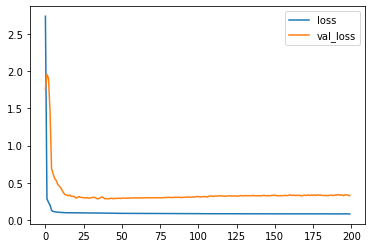

In [48]:
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

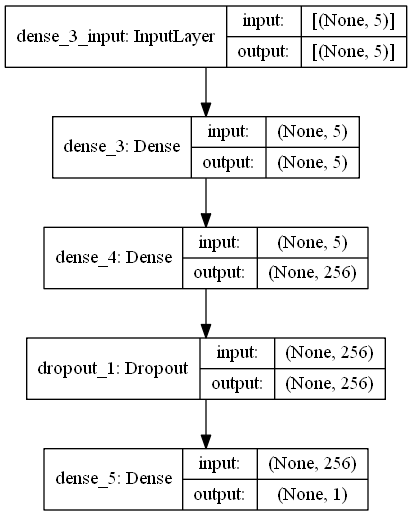

In [49]:
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)

In [50]:

model.predict(dfx[0:10])

array([[115.24966 ],
       [133.69223 ],
       [ 99.065254],
       [ 65.43381 ],
       [143.98808 ],
       [ 91.90129 ],
       [ 66.485275],
       [171.30823 ],
       [ 72.20396 ],
       [ 88.06478 ]], dtype=float32)

In [51]:
y.head(10)

0     105.284502
2     118.987011
4      79.210001
7      58.989774
8     135.587108
9      59.739057
12     79.919170
13    133.371121
14     62.327622
18     60.050886
Name: CO2W, dtype: float64

In [52]:
pre = pd.read_csv('test_P2.csv')

In [53]:
prex=pre

In [54]:
columns =  ['topology','functional_groups'] ## feature ที่ทำการ ont hot
#prex = dummyEncoder(prex,columns)

In [55]:
prex

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]
0,mof_unit_68614,1208.301332,797.70936,586.54,0.11392,0.1039,OEt,2,5,26,pcu,36.639791,7.005640
1,mof_unit_68615,4126.414623,3733.65779,852.49,0.21367,0.1422,H-I,4,6,17,acs,18.390691,5.119399
2,mof_unit_68616,1602.148373,747.21048,3155.73,0.33883,0.4375,CN-OH,3,11,17,pcu,13.062850,5.045400
3,mof_unit_68617,2436.629312,995.80232,3521.09,0.40464,0.5963,OMe,2,1,28,pcu,9.601198,5.106238
4,mof_unit_68618,3123.418006,1337.53800,2678.46,0.38959,0.5479,NO2-Pr,3,8,19,pcu,12.974954,5.287639
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,mof_unit_85609,32660.944605,4723.68288,5720.14,0.77614,3.2318,OH-NO2,3,3,14,nbo,4.536626,3.146698
16996,mof_unit_85610,5070.998617,1499.13262,4017.28,0.59192,1.2058,Me-OMe,3,1,11,nbo,6.745508,3.658871
16997,mof_unit_85611,4669.804446,1322.04892,4288.76,0.54950,1.1689,Me-CN,2,7,23,pcu,4.666206,3.593052
16998,mof_unit_85612,4682.120862,1213.51148,4331.86,0.60643,1.4091,OH-HCO,3,7,25,pcu,4.823305,3.454497


In [56]:
prex.columns

Index(['MOFname', 'volume [A^3]', 'weight [u]', 'surface_area [m^2/g]',
       'void_fraction', 'void_volume [cm^3/g]', 'functional_groups',
       'metal_linker', 'organic_linker1', 'organic_linker2', 'topology',
       'CO2/N2_selectivity', 'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]'],
      dtype='object')

In [57]:
#prex=prex.drop(columns=['MOFname','weight [u]','metal_linker','organic_linker1', 'organic_linker2',  'etb', 'sra', 'fof', 'bcu', 'tbo', 'pts',
  #     'the', 'rht','CO2/N2_selectivity' ])

In [58]:
prex=pre.drop(columns=['MOFname','weight [u]', 'functional_groups','topology','metal_linker','organic_linker1', 'organic_linker2','CO2/N2_selectivity' ])

In [59]:
dfx

array([[0.08460239, 0.24673493, 0.1268936 , 0.06520571, 0.62803775],
       [0.08014933, 0.14958119, 0.2389436 , 0.13556773, 0.55482108],
       [0.08810754, 0.12141805, 0.1249498 , 0.06348695, 0.57656443],
       ...,
       [0.37672171, 0.39960498, 0.76732156, 0.52411645, 0.21406693],
       [0.63380835, 0.46706683, 0.93643271, 0.85164894, 0.12197341],
       [0.13598704, 0.25905682, 0.48498771, 0.21892792, 0.24353801]])

In [60]:
prex

,volume [A^3],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]
0,1208.301332,586.54,0.11392,0.1039,7.005640
1,4126.414623,852.49,0.21367,0.1422,5.119399
2,1602.148373,3155.73,0.33883,0.4375,5.045400
3,2436.629312,3521.09,0.40464,0.5963,5.106238
4,3123.418006,2678.46,0.38959,0.5479,5.287639
...,...,...,...,...,...
16995,32660.944605,5720.14,0.77614,3.2318,3.146698
16996,5070.998617,4017.28,0.59192,1.2058,3.658871
16997,4669.804446,4288.76,0.54950,1.1689,3.593052
16998,4682.120862,4331.86,0.60643,1.4091,3.454497


In [61]:
#columns =  ['topology'] ## feature ที่ทำการ ont hot
#prex = dummyEncoder(prex,columns)

In [62]:
prex = prex.astype('float64')
prex = sc.fit_transform(prex)

In [63]:
prex

array([[0.00765594, 0.07816555, 0.09287655, 0.01387466, 0.56902197],
       [0.04489559, 0.11665709, 0.212279  , 0.02010443, 0.36647053],
       [0.01268204, 0.4500102 , 0.36209765, 0.06813709, 0.35852425],
       ...,
       [0.05183008, 0.61399619, 0.61427323, 0.18710454, 0.20256582],
       [0.05198726, 0.62023415, 0.68241941, 0.22617479, 0.18768728],
       [0.32024147, 0.71786039, 0.81513269, 0.37373737, 0.15712343]])

In [64]:
y_pred=model.predict(prex)

In [65]:
y_pred.max()

157.03888

In [66]:
y_pred.min()

-84.338356

In [67]:
lookname = pd.read_csv('train.csv')

In [242]:
lookname.columns

Index(['MOFname', 'volume [A^3]', 'weight [u]', 'surface_area [m^2/g]',
       'void_fraction', 'void_volume [cm^3/g]', 'functional_groups',
       'metal_linker', 'organic_linker1', 'organic_linker2', 'topology',
       'CO2/N2_selectivity', 'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]',
       'CO2_working_capacity [mL/g]'],
      dtype='object')

In [243]:
y_pred=pd.DataFrame(y_pred,columns=['CO2_working_capacity [mL/g]'])

In [244]:
y_pred.to_csv("D:/submission.csv")

In [145]:
pre_data = pd.concat([pre, y_pred], axis=1)

In [134]:
pre_data

NameError: name 'pre_data' is not defined

In [210]:
pre_data.to_csv("D:/pre2.csv")